# WeatherPy
----
### By Christopher Reutz
### Analysis
* All conclusions are based on weather observations recorded at on 3/1/19.
* Temperature is definitely higher below the equator since the current northern hemisphere season is winter and the sun is below the equator.  Several significantly high temperatures are recorded around -40 degrees latitude but temperatures remain relatively warm until dropping off precipitously above +20 degrees latitude.
* Humidity and cloudiness appear to have no correlation to latitude.
* Some higher wind speeds appear to be recorded further north and further south - but mostly in the higher north regions.  This is likely due to the jet streams that occur in the hemispheres.

---


In [1]:
%autosave 0

# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

Autosave disabled


In [6]:
# GENERATE CITIES LIST
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

593

In [7]:
# PERFORM API CALLS
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

# Create settings dictionary with information we're interested in.
settings = {"units": "imperial", "appid": api_key}

# Variable to store the date the weather info was retrieved.
weather_date = (time.strftime("%m/%d/%y"))

# Create data frame to store the data pulled via API.
weather_df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity",
                                   "Lat", "Lng", "Max Temp", "Wind Speed"])
print(f"Beginning Data Retrieval")
print(f"------------------------")

rec_num = 0    # Record number of the city from the cities list
idx = 0        # Variable for the index of the weather dataframe

for city in cities:
    try:
        # Increment the record count, retrieve the weather data,
        # and copy data elements into a dataframe.
        rec_num += 1
        weather_data = owm.get_current(city, **settings)
        weather_df.loc[idx, "City"] = weather_data["name"]
        weather_df.loc[idx, "Cloudiness"] = weather_data["clouds"]["all"]
        weather_df.loc[idx, "Country"] = weather_data["sys"]["country"]
        weather_df.loc[idx, "Date"] = weather_data["dt"]
        weather_df.loc[idx, "Humidity"] = weather_data["main"]["humidity"]
        weather_df.loc[idx, "Lat"] = weather_data["coord"]["lat"]
        weather_df.loc[idx, "Lng"] = weather_data["coord"]["lon"]
        weather_df.loc[idx, "Max Temp"] = weather_data["main"]["temp_max"]
        weather_df.loc[idx, "Wind Speed"] = weather_data["wind"]["speed"]
        idx += 1
        print(f"Processed record {rec_num}, {city}.")
    
    except:
        # If the city is not found, state that and continue.
        print(f"Couldn't find record {rec_num}, {city}.")

print(f"------------------------")
print(f"Data Retrieval Complete!")

Beginning Data Retrieval
------------------------
Processed record 1, hermanus.
Processed record 2, albany.
Processed record 3, naze.
Processed record 4, yabrud.
Couldn't find record 5, san jeronimo de tunan.
Processed record 6, new norfolk.
Processed record 7, cagliari.
Processed record 8, salalah.
Processed record 9, dikson.
Processed record 10, cayenne.
Processed record 11, baykit.
Processed record 12, mar del plata.
Processed record 13, longyearbyen.
Processed record 14, pecos.
Processed record 15, punta arenas.
Processed record 16, vaini.
Processed record 17, port alfred.
Processed record 18, hendek.
Processed record 19, rikitea.
Processed record 20, butaritari.
Processed record 21, atuona.
Processed record 22, mataura.
Processed record 23, modrica.
Processed record 24, constitucion.
Processed record 25, kapaa.
Processed record 26, upernavik.
Processed record 27, rongcheng.
Processed record 28, jamestown.
Processed record 29, talnakh.
Couldn't find record 30, porto santo.
Processe

Processed record 253, pisco.
Processed record 254, kavieng.
Processed record 255, ust-kuyga.
Couldn't find record 256, shkotovo-26.
Processed record 257, payyannur.
Processed record 258, umred.
Processed record 259, taoudenni.
Processed record 260, balabac.
Processed record 261, helena.
Processed record 262, dawei.
Processed record 263, juneau.
Processed record 264, launceston.
Processed record 265, fortuna.
Couldn't find record 266, grand river south east.
Processed record 267, portland.
Couldn't find record 268, jiroft.
Processed record 269, angoche.
Processed record 270, collie.
Processed record 271, oranjestad.
Processed record 272, nome.
Processed record 273, moose jaw.
Processed record 274, zaysan.
Processed record 275, gijon.
Processed record 276, leiyang.
Processed record 277, katsuura.
Processed record 278, jieshi.
Processed record 279, nioro.
Processed record 280, caohe.
Processed record 281, souillac.
Processed record 282, leshukonskoye.
Processed record 283, severo-kurilsk.

Processed record 500, cortazar.
Processed record 501, agbor.
Processed record 502, katobu.
Processed record 503, ancud.
Processed record 504, nampa.
Processed record 505, enfield.
Processed record 506, saint anthony.
Processed record 507, chiredzi.
Processed record 508, elk city.
Processed record 509, cascais.
Processed record 510, ixtapa.
Processed record 511, guerrero negro.
Processed record 512, batagay.
Processed record 513, farafangana.
Processed record 514, skoghall.
Processed record 515, kearney.
Processed record 516, phuket.
Processed record 517, nokaneng.
Processed record 518, maceio.
Couldn't find record 519, atlantic city.
Processed record 520, rio grande.
Processed record 521, itarema.
Processed record 522, alekseyevsk.
Processed record 523, puerto del rosario.
Processed record 524, kerrobert.
Processed record 525, sinaloa.
Processed record 526, westport.
Processed record 527, kirakira.
Processed record 528, yashalta.
Processed record 529, gat.
Processed record 530, delmenh

In [8]:
# CONVERTING RAW DATA TO DATAFRAME
# Export the city data into a .csv
# Display the DataFrame

weather_df.to_csv(output_data_file, index=False, header=True)
weather_df.describe()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,526,526,526,526,526,526.00,526.00,526.0,526.0
unique,526,22,121,279,80,513.00,522.00,346.0,150.0
top,Cap Malheureux,0,RU,1551492000,100,67.55,124.29,78.8,4.7
freq,1,132,58,73,54,2.00,2.00,10.0,27.0


In [9]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,8,ZA,1551492976,92,-34.42,19.24,64.99,3.04
1,Albany,90,US,1551493566,63,42.65,-73.75,28.99,4.16
2,Naze,20,NG,1551488400,94,5.43,7.07,78.8,3.15
3,Yabrud,20,SY,1551493016,89,33.97,36.66,35.01,1.01
4,New Norfolk,0,AU,1551493815,12,-42.78,147.06,100.99,16.11


In [10]:
# PLOTTING THE DATA
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# Create lists for data to be plotted
vals_lat = weather_df["Lat"]
vals_humid = weather_df["Humidity"]
vals_mtemp = weather_df["Max Temp"]
vals_cloud = weather_df["Cloudiness"]
vals_winds = weather_df["Wind Speed"]

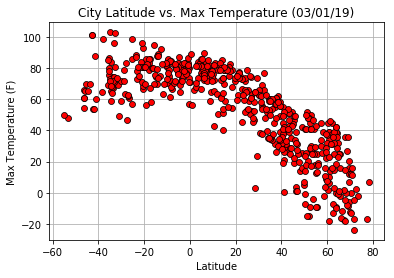

In [11]:
# Latitude vs. Temperature Plot

plt.scatter(vals_lat, vals_mtemp, marker="o", facecolors="red",
            edgecolors="black", linewidth=0.75, zorder=2)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.grid(zorder=1)
plt.savefig("output_data/city_lat_vs_maxtemp.png", dpi=180, bbox_inches="tight")

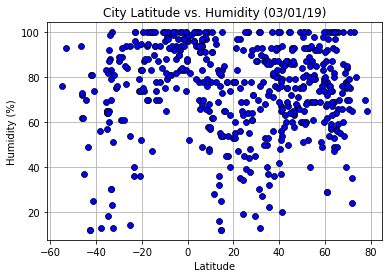

In [12]:
# Latitude vs. Humidity Plot

plt.scatter(vals_lat, vals_humid, marker="o", facecolors="blue",
            edgecolors="black", linewidth=0.75, zorder=2)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.grid(zorder=1)
plt.savefig("output_data/city_lat_vs_humidity.png", dpi=180, bbox_inches="tight")

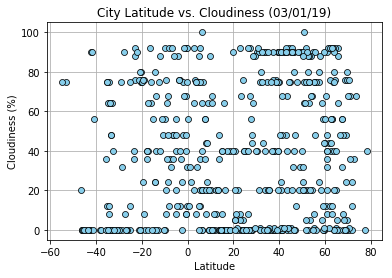

In [13]:
# Latitude vs. Cloudiness Plot

plt.scatter(vals_lat, vals_cloud, marker="o", facecolors="skyblue",
            edgecolors="black", linewidth=0.75, zorder=2)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.grid(zorder=1)
plt.savefig("output_data/city_lat_vs_cloudiness.png", dpi=180, bbox_inches="tight")

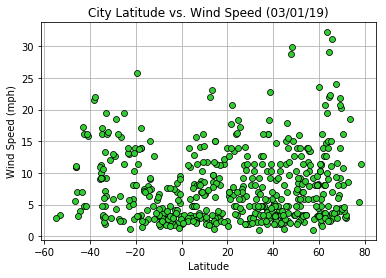

In [14]:
# Latitude vs. Wind Speed Plot

plt.scatter(vals_lat, vals_winds, marker="o", facecolors="limegreen",
            edgecolors="black", linewidth=0.75, zorder=2)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.grid(zorder=1)
plt.savefig("output_data/city_lat_vs_windspeed.png", dpi=180, bbox_inches="tight")